### Persistent homology examples

* Ripser [paper](https://www.theoj.org/joss-papers/joss.00925/10.21105.joss.00925.pdf) [code](https://github.com/scikit-tda/ripser.py) (fast)
* Dionysus 2 [code](https://mrzv.org/software/dionysus2/) (representative examples)
* Nico's [code](https://github.com/nhchristianson/Math-text-semantic-networks)
* Ann's [code](https://github.com/asizemore/PH_tutorial/blob/master/Tutorial_day1.ipynb)

In [1]:
%load_ext autoreload
%autoreload 2

### Load graphs

In [2]:
topics = ['biochemistry']
# path_saved = '/Users/harangju/Box Sync/Research/my papers/wikipedia paper/data/graphs/full_page/dated/filled/'
path_saved = '/Users/harangju/Box Sync/Research/my papers/wikipedia paper/data/graphs/top_section/dated/filled/'

In [ ]:
import wiki

networks = {}
for topic in topics:
    networks = wiki.Net()
    networks[topic] = networks.load_graph(path_saved + topic + '.gexf')
networks

### Try persistent homology

#### Simplices
Example format:
``` python
simplices = [([2], 4), ([1,2], 5), ([0,2], 6),
             ([0], 1),   ([1], 2), ([0,1], 3)]
```
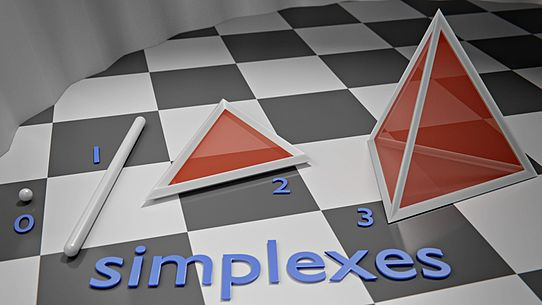

In [ ]:
for i in range(len(m)):
    if m.pair(i) < i: continue      # skip negative simplices
    dim = f[i].dimension()
    birth = int(f[i].data)
    simplex = [nodes[s] for s in f[i]]
    if m.pair(i) != m.unpaired:
        death = int(f[m.pair(i)].data)
        death_simplex = [nodes[s] for s in f[m.pair(i)]]
        death_nodes = [n for n in death_simplex
                       if death==graph.nodes[n]['year']]
        print('dim={}, ({}, {}) \t{}---{} in {}'.format(dim, birth, death, simplex, 
                                                        death_nodes, death_simplex))
    else:
        print('dim={}, ({}, _) \t{}--'.format(dim, birth, simplex))

#### Plotting

In [ ]:
import math

def betti_curves(diagrams):
    """
    Parameters
    ----------
    diagrams: dionysus.DiagramPoint
        persistence diagram with elements
        (int betti_number, int start, int death)
    Returns
    -------
    curves: numpy array
        {int betti_number: numpy.array}
    """
    betti_numbers = [i for i, _ in enumerate(dgms)]
    birth = [pt.birth for dgm in diagrams for pt in dgm]
    death = [pt.death for dgm in diagrams for pt in dgm]
    times = sorted(list(set(birth + death)))
    max_time = times[-2]+1 if max(times)==math.inf else times[-1]
    curves = np.zeros([betti_numbers[-1]+1, int(max_time)])
    for betti, dgm in enumerate(diagrams):
        for pt in dgm:
            birth = max_time if pt.birth==math.inf else pt.birth
            death = max_time if pt.death==math.inf else pt.death
            curves[betti, int(birth):int(death)] += 1
    return curves

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set(color_codes=True)

def plot_barcode(barcode):
    """
    Parameters
    ----------
    barcode: [(int dim, int birth, int death)]
    """
    df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
    g = sns.relplot(x="time", y="value", kind="line", data=df)
    for bar in barcode:
        

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', font_scale=2)

In [ ]:
m = d.homology_persistence(f)
barcode = []
for i in range(len(m)):
    if m.pair(i) < i: continue
    dim = f[i].dimension()
    birth = int(f[i].data)
    simplex = [nodes[s] for s in f[i]]
    if m.pair(i) != m.unpaired:
        death = int(f[m.pair(i)].data)
        death_simplex = [nodes[s] for s in f[m.pair(i)]]
        death_nodes = [n for n in death_simplex
                       if death==graph.nodes[n]['year']]
        barcode.append([dim, birth, death, [birth, death],
                        simplex, death_nodes, death_simplex])
    else:
        barcode.append([dim, birth, np.inf, [birth, np.inf],
                        simplex, [], []])

In [ ]:
bar_data = pd.DataFrame(barcode, columns=['dim', 'birth', 'death',
                                          'lifetime',
                                          'birth simplex',
                                          'death nodes',
                                          'death_simplex'])
bar_data = bar_data.sort_values(by=['dim', 'birth'])
bar_data

In [ ]:
import matplotlib._color_data as mcd
colors = mcd.XKCD_COLORS
colors = [mcd.XKCD_COLORS['xkcd:'+c]
          for c in ['emerald green', 'tealish', 'peacock blue', 
                    'grey', 'brown', 'red', 'yellow']]
colors

In [ ]:
fig = plt.figure(figsize=(15,10))
for i, row in bar_data.iterrows():
    birth = row['birth']
    death = row['death']
#     if death == np.inf or birth < 1900: continue
    if death > 1000 : continue
    x = [birth, 2020] if death==np.inf else\
        [birth, death]
    plt.plot(x, i*np.ones(len(x)), colors[row['dim']])
    if death and death != np.inf:
        plt.plot([death-1,death], [i,i],
                 mcd.XKCD_COLORS['xkcd:red'])

In [ ]:
m = d.homology_persistence(f)
dgms = d.init_diagrams(m, f)
betti = betti_curves(dgms)
# print(betti.shape)
betti
data = pd.DataFrame(betti.transpose(),
                    index=years + list(range(max(years)+1,max(years)+1)),
                    columns=[r'$\beta_'+str(i)+'$' for i,_ in enumerate(dgms)])
sns.lineplot(data=data, linewidth=2)
plt.axvline(x=max(years), color='xkcd:grey', alpha=0.5, linestyle=':')
# plt.xlim([1900, 2020])
plt.title('Betti curves')
plt.xlabel('year')
plt.ylabel('Number of live cycles')